In [4]:
import pandas as pd

#loading the csv files
customer_data = pd.read_csv('/content/drive/MyDrive/purchase_behaviour.csv')

transaction_data = pd.read_csv('/content/drive/MyDrive/transaction_data.csv')

#this will show us the 1st 5 rows
print(customer_data.head())
print(transaction_data.head())



   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

In [5]:
# Merging the common column of both datasets
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='inner')

print(merged_data.head())


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  
4  MIDAGE SINGLES/COUPL

In [6]:
# missing vals
print(merged_data.isnull().sum())

print(merged_data.dtypes)

# removing similar rows if any
merged_data = merged_data.drop_duplicates()

print(merged_data.head())


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE                  int64
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6

In [7]:
# here we grouped the data by product and calc the total sum
product_sales = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sorting for top3
top_3_products = product_sales.sort_values(by='TOT_SALES', ascending=False).head(3)

print(top_3_products)


                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


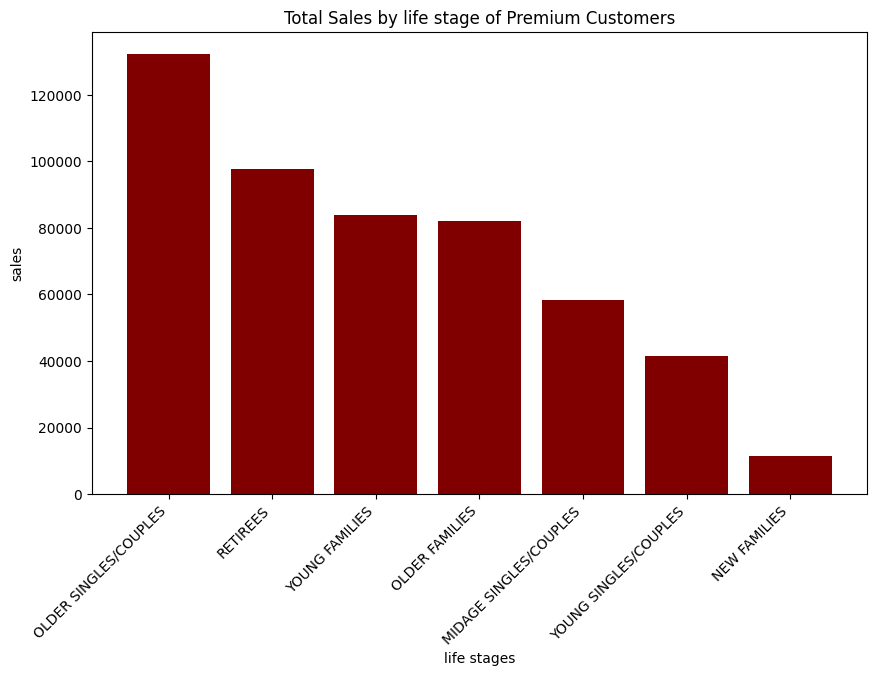

In [16]:
import matplotlib.pyplot as plt


# filtering out the premium customers as they are most loyal
premium_customers = merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Premium']

# again grouping by lifestage and total sum
loyal_customer_sales = premium_customers.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()


sorted_loyal_customer_sales = loyal_customer_sales.sort_values(by='TOT_SALES', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_loyal_customer_sales['LIFESTAGE'], sorted_loyal_customer_sales['TOT_SALES'], color='maroon')
plt.xlabel('life stages')
plt.ylabel('sales')
plt.title('Total Sales by life stage of Premium Customers')
plt.xticks(rotation=45, ha='right')
plt.show()


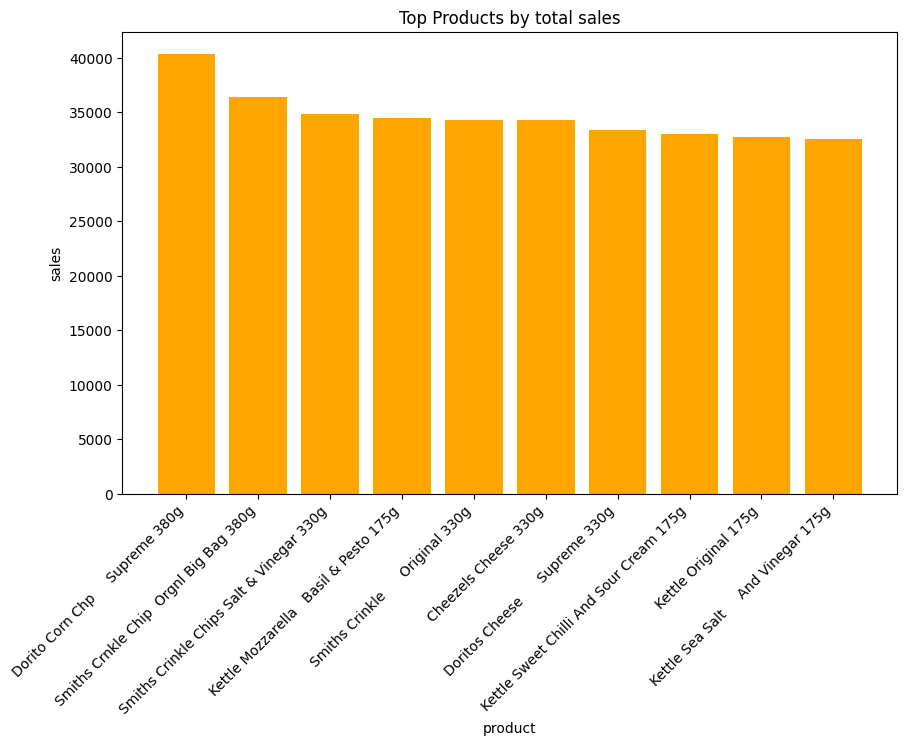

In [17]:

product_sales = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()


sorted_product_sales = product_sales.sort_values(by='TOT_SALES', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_product_sales['PROD_NAME'][:10], sorted_product_sales['TOT_SALES'][:10], color='orange')
plt.xlabel('product')
plt.ylabel('sales')
plt.title('Top Products by total sales')
plt.xticks(rotation=45, ha='right')
plt.show()
